# Menganalisis Perilaku Klien Paket Prabayar dan Keuntungan Paket Prabayar

Anda adalah seorang analis pada perusahaan operator telekomunikasi Megaline. Megaline memiliki dua paket prabayar kepada kliennya, yakni Surf dan Ultimate. Departemen periklanan meminta bantuan Anda untuk mengetahui perilaku klien paket prabayar dan paket prabayar mana yang memberikan keuntungan yang lebih besar sehingga departemen periklanan bisa mengatur budget iklan untuk paket prabayar ini. 

Berikut adalah deskripsi dari paket prabayar Surf dan Ultimate:

Surf:
- Biaya bulanan: 20 Dollar
- 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
- Setelah melebihi batas paket, akan dikenakan:
        - 1 menit: 3 sen
        - 1 SMS: 3 sen
        - 1 GB data: 10 Dollar
        
Ultimate:
- Biaya bulanan: 70 Dollar
- 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
- Setelah melebihi batas paket, akan dikenakan:
        - 1 menit: 1 sen
        - 1 SMS: 1 sen
        - 1 GB data: 7 Dollar

Beberapa hipotesis dalam proyek ini:
- Terdapat perbedaan pendapatan antara paket surf dan paket ultimate
- Pelanggan pada daerah NY-NJ memiliki pendapatan yang lebih besar dibandingkan dengan pelanggan diluar daerah NY-NJ

## Pra-pemrosesan

Pertama dilakukan pemanggilan library - library yang diperlukan dalam pengerjaan proyek ini.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Pemanggilan dataset 

Setelah itu dilakukan pemanggilan dataset yang diperlukan dalam pengerjaan proyek ini 

In [3]:
try:
    call = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    sms = pd.read_csv('/datasets/megaline_messages.csv')
    plan = pd.read_csv('/datasets/megaline_plans.csv')
    user = pd.read_csv('/datasets/megaline_users.csv')

except:
    call = pd.read_csv('C:/Users/ASUS/megaline_calls.csv')
    internet = pd.read_csv('C:/Users/ASUS/megaline_internet.csv')
    sms = pd.read_csv('C:/Users/ASUS/megaline_messages.csv')
    plan = pd.read_csv('C:/Users/ASUS/megaline_plans.csv')
    user = pd.read_csv('C:/Users/ASUS/megaline_users.csv')

### Pengekplorasian data awal

Setelah memanggil data, pertama dilakukan pengeksploriasian data pada dataset yang ditampilkan. Pertama pada dataset `call` terdapat kolom sebagai berikut:
- `id` — ID sesi web unik
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)
- `user_id` — ID pengguna yang melakukan panggilan

Lalu pada dataset `internet` terdapat kolom sebagai berikut:
- `id` — ID sesi web unik
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)
- `session_date` — tanggal sesi web
- `user_id` — ID pengguna

Pada dataset `sms` terdapat kolom sebagai berikut:
- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

Pada dataset `plan` terdapat kolom sebagai berikut:
- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

Terakhir, pada dataset `user` terdapat kolom sebagai berikut:
- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age` — usia pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
- `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

#### Pengeksplorasian dataset call

Pertama akan dilihat untuk dataset call

In [4]:
call.info()
call.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [5]:
call.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Sekilas dapat terlihat bahwa terdapat kurang lebih 500 pengguna yang tercatat pada dataset `call` ini. Dapat terlihat dari `user_id` dari 1000 hingga 1499. Selain itu rata - rata pelanggan menghabiskan waktu menelepon kurang lebih 7 menit, dengan waktu tercepat ada 0 menit dan terlama adalah 37,6 menit. Pada kolom `call_date`, tipe data bisa dirubah menjadi datetime agar lebih mudah dilakukan analisa tahap berikutnya.

#### Pengeksplorasian dataset internet

Lalu akan dilihat untuk dataset interet

In [6]:
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [7]:
internet.head(15)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Dari sini juga terlihat bahwa terdapat 500 user dengan seluruh pengguna menghabiskan rata - rata internet sebesar 366 megabita dengan jumlah terkecil adalah 0 megabita dan jumlah terbesar adalah 1693,47 megabita. Kolom `session_date` bisa diubah tipe datanya menjadi datetime agar mudah dilakukan analisa tahap berikutnya.

#### Pengeksplorasian dataset sms

Selanjutnya dilakukan pengeksplorasian dataset sms

In [8]:
sms.info()
sms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [9]:
sms.head(15)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Pada dataset sms, sekilas hanya terlihat bahwa terdapat `user_id` dari 1000 hingga 1497, dan dari informasi sekilas tidak menggambarkan secara detail berapa banyak pengguna yang tidak menggunakan sms. sehingga perlu dilakukan sedikit eksplorasi lebih lanjut.

In [10]:
sms.groupby('user_id')['id'].count().describe()

count     402.000000
mean      189.181592
std       192.207920
min         1.000000
25%        60.000000
50%       126.500000
75%       258.750000
max      1288.000000
Name: id, dtype: float64

Dapat terlihat bahwa hanya terdapat 402 pengguna yang berlangganan paket prabayar yang menggunakan jasa SMS. Dari 402 pengguna ini, rata - rata mereka mengirimkan SMS sebanyak 189 buah, dengan jumlah terkecil adalah 1 SMS dan jumlah terbesar adalah 1288 SMS. Untuk kolom `message_date` tipe datanya bisa diubah menjadi datetime agar mudah untuk dilakukan analisa tahap selanjutnya.

#### Pengeksplorasian dataset plan

Selanjutnya dilakukan pengeksplorasian dataset plan

In [11]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dataset plan menunjukan paket prabayar yang ditawarkan oleh Megaline dalam bentuk tabel.

#### Pengeksplorasian dataset user

Terakhir dilakukan pengeksplorasian dataset user

In [13]:
user.info()
user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [14]:
user.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Dataset user adalah tabel yang berisi jumlah user yang terdapat pada dataset ini. Terdapat 500 user sesuai dengan dataset `call` dan `intenet`, dan terdapat 34 user yang telah berhenti berlangganan paket prabayar dari Megaline ini. Rata - rata dari usia pengguna paket prabayar Megaline adalah 45 tahun, dengan usia termuda adalah 18 tahun dan usia tertua adalah 75 tahun.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Bagus sekali.
</div>

### Kesimpulan sementara

Dari 5 dataset yang ada, dapat diambil kesimpulan sementara, yakni:
- Terdapat 500 pengguna yang tercatat pada dataset ini, dengan 34 diantaranya telah berhenti berlangganan paket prabayar Megaline.
- Rata - rata pengguna paket data Megaline berusia 45 tahun, dengan usia termuda adalah 18 tahun dan usia tertua adalah 75 tahun.
- Rata - rata pengguna menghabiskan waktu menelepon kurang lebih 7 menit, dengan waktu tercepat ada 0 menit dan terlama adalah 37,6 menit.
- Rata - rata pengguna menggunakan internet sebesar 366 megabita dengan jumlah terkecil adalah 0 megabita dan jumlah terbesar adalah 1693,47 megabita.
- Terdapat 402 pengguna yang berlangganan paket prabayar yang menggunakan jasa SMS. Dari 402 pengguna ini, rata - rata mereka mengirimkan SMS sebanyak 189 buah, dengan jumlah terkecil adalah 1 SMS dan jumlah terbesar adalah 1288 SMS.
- Kolom - kolom yang memuat tanggal, seperti `call_date`, `session_date`, `message_date`, dan `reg_date` tipe datanya masih berupa objek. Sehingga perlu dilakukan perubahan tipe data menjadi datetime agar mudah dilakukan analisa tahap berikutnya.
- Hanya terdapat 1 kolom yang berisi nilai hilang, yakni `churn_date`. Nilai ini dapat diganti dengan hari terakhir di tahun 2018, setelah itu tipe datanya dapat diubah menjadi datetime.

Selain itu Megaline membulatkan waktu setiap panggilan dari detik menjadi menit dan akumulasi internet secara bulanan dari megabita menjadi gigabita.

## Pemrosesan Data

### Perbaikan tipe data dan pengisian nilai hilang

Pertama dilakukan perbaikan untuk kolom `churn_date`

In [15]:
user['churn_date'].fillna('2018-12-31', inplace = True)
user['churn_date'].isna().sum()

0

Dilakukan perbaikan tipe data pada kolom yang menggandung tanggal seperti `call_date`, `session_date`, `message_date`, `reg_date` dan `churn_date` menjadi tipe data datetime agar data bisa dilakukan analisa tahap selanjutnya 

In [16]:
cols_datetime = ["call['call_date']", "internet['session_date']", "sms['message_date']"
                , "user['reg_date']", "user['churn_date']"]
for col in cols_datetime:
    exec(col + " = pd.to_datetime(" + col + ")")

In [17]:
#Pengetesan untuk mengecek tipe data setelah dilakukan perubahan
call.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

### Pemrosesan dataset user

Pada dataset user, terdapat kolom `city` bisa dirapikan agar kedepannya bisa dilakukan proses analisa lebih lanjut, yakni dengan mengambil hanya wilayah / state dan mengelompokannya menjadi apakah kota dari pelanggan merupakan wilayah NY-NJ atau bukan

In [18]:
#Menambah kolom state
user['state'] = user['city'].str.split(', ').str[1] 
#membagi kolom city dengan ', ' sehingga terbagi menjadi 2 bagian dan diambil paruh kedua
user['state'] = user['state'].str.replace('MSA', '') # Menghilangkan katas MSA
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,WA


Untuk mempermudah analisis yang membedakan mana pelanggan yang berasal dari wilayah NY-NJ, akan ditambahkan kolom baru yang membagi pelanggan yang berasal dari NY-NJ atau bukan

In [19]:
user['from_ny_nj'] = user['state'].str.contains('NY-NJ', regex=True)
user.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,from_ny_nj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,WA,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,NV,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,OK,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,WA,False
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31,TX,False
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31,MI,False
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,FL,False
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,CA,False


### Pembulatan dan pengelompokan data

#### Pemrosesan data untuk dataset call

Dalam dataset, mungkin saja terdapat data yang mencatat durasi telepon sebesar 0 detik, sehingga perlu dilihat seberapa banyak data yang menggandung durasi telepon lebih dari 0 detik

In [20]:
call[call['duration'] == 0]['id'].count()/call['id'].count()

0.1948233927469416

Terdapat hampir 20% tercatat durasi telepon sebesar 0 detik. Walau memang akan terlihat bahwa data durasi telepon akan condong kecil namun dalam kasus ini kita ingin melihat akumulasi dari durasi dari setiap terdapat telepon, dan 0 dalam kolom `duration` telah menunjukan bahwa tidak ada telepon sama sekali sehingga tidak memengaruhi perhitungan akumulasi durasi perbulan, sehingga data tidak perlu dihilangkan.

Selanjutnya dilakukan pembulatan nilai untuk kolom `duration` pada dataset call. Dan karena `duration` dalam menit kita bisa merubah tipe data menjadi interger

In [21]:
call['duration_round'] = call['duration'].apply(np.ceil).astype('int')

In [22]:
call

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9
137731,1499_200,1499,2018-10-20,10.89,11
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,1


Selanjutnya ditambahkan kolom bulan dan tahun untuk dataset call. Hal ini bertujuan untuk memudahkan pengelompokan per id dan bulan. Agar memastikan bahwa tidak ada bulan yang memiliki tahun sama (seperti bulan januari tahun 2017 dan 2018) dan untuk memudahkan proses analisa untuk data analis yang mungkin akan mengolah data dalam beberapa tahun kedepan.

In [23]:
#Penambahan kolom bulan dan tahun untuk dataset call
call['month'] = call['call_date'].dt.to_period("M")

In [24]:
call.head(10)

,id,user_id,call_date,duration,duration_round,month
0,1000_93,1000,2018-12-27,8.52,9,2018-12
1,1000_145,1000,2018-12-27,13.66,14,2018-12
2,1000_247,1000,2018-12-27,14.48,15,2018-12
3,1000_309,1000,2018-12-28,5.76,6,2018-12
4,1000_380,1000,2018-12-30,4.22,5,2018-12
5,1000_388,1000,2018-12-31,2.20,3,2018-12
6,1000_510,1000,2018-12-27,5.75,6,2018-12
7,1000_521,1000,2018-12-28,14.18,15,2018-12
8,1000_530,1000,2018-12-28,5.77,6,2018-12
9,1000_544,1000,2018-12-26,4.40,5,2018-12


Setelah penambahan kolom ini, dilakukan pengelompokan akan id dan bulan penggunaan, lalu dilakukan akumulasi akan penggunaan telepon sesuai dengan pengelompokan tersebut.

In [25]:
#Pengelompokan dataset call terhadap user_id dan bulan pada dataset baru
call_userid_group = call.groupby(['user_id', 'month']).agg({
    'duration_round' : 'sum'
}).reset_index()

In [26]:
call_userid_group.head(10)

,user_id,month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
5,1001,2018-12,412
6,1002,2018-10,59
7,1002,2018-11,386
8,1002,2018-12,384
9,1003,2018-12,1104


#### Pemrosesan data untuk dataset sms

Untuk pemrosesan data untuk dataset sms, caranya mirip dengan pemrosesan untuk dataset telepon, namun tidak ada pembulatan data.

In [27]:
#Penambahan kolom bulan dan tahun untuk dataset sms
sms['month'] = sms['message_date'].dt.to_period("M")

In [28]:
#Pengelompokan dataset sms terhadap user_id dan bulan pada dataset baru
sms_userid_group = sms.groupby(['user_id', 'month']).agg({
    'id' : 'count'
}).reset_index().rename(columns={
    'id' : 'message_count'    
})

In [29]:
sms_userid_group.head(10)

,user_id,month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
5,1001,2018-12,44
6,1002,2018-10,15
7,1002,2018-11,32
8,1002,2018-12,41
9,1003,2018-12,50


#### Pemrosesan dataset internet

Pemrosesan dataset internet kurang lebih mirip dengan pemrosesan yang telah dilakukan untuk dataset sms dan telepon. Namun terdapat tambahan, yakni Megaline membulatkan penggunaan internet dengan mengakumulasikan penggunaan internet secara bulanan dan dilakukan pembulatan keatas.

In [30]:
internet['month'] = internet['session_date'].dt.to_period("M")

In [31]:
internet_userid_group = internet.groupby(['user_id', 'month']).agg({
    'mb_used' : 'sum'
}).reset_index()

In [32]:
#Mengubah nilai megabita menjadi gigabita dan membulatkan keatas
internet_userid_group['gb_used'] = internet_userid_group['mb_used']/1024
internet_userid_group['gb_used_round'] = internet_userid_group['gb_used'].apply(np.ceil)

In [33]:
internet_userid_group.head(10)

,user_id,month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2.0
1,1001,2018-08,6919.15,6.756982,7.0
2,1001,2018-09,13314.82,13.002754,14.0
3,1001,2018-10,22330.49,21.807119,22.0
4,1001,2018-11,18504.30,18.070605,19.0
5,1001,2018-12,19369.18,18.915215,19.0
6,1002,2018-10,6552.01,6.398447,7.0
7,1002,2018-11,19345.08,18.891680,19.0
8,1002,2018-12,14396.24,14.058828,15.0
9,1003,2018-12,27044.14,26.410293,27.0


### Menghitung pendapatan bulanan pengguna

Setelah melakukan pemrosesan data untuk dataset call, sms, dan internet, langkah selanjutnya adalah menghitung pendapatan bulanan pengguna berdasarkan penggunaan paket prabayar dengan biaya tambahan dari kelebihan batas paket gratis.

In [34]:
#penggabungan untuk dataset telepon dan internet
call_internet = pd.merge(call_userid_group, internet_userid_group, on=['user_id', 'month'], how='outer')

In [35]:
#penggabungan untuk dataset telepon, internet, dan sms
user_merge = pd.merge(call_internet, sms_userid_group, on=['user_id', 'month'],how='outer')

In [36]:
user_merge.head()

,user_id,month,duration_round,mb_used,gb_used,gb_used_round,message_count
0,1000,2018-12,124.0,1901.47,1.856904,2.0,11.0
1,1001,2018-08,182.0,6919.15,6.756982,7.0,30.0
2,1001,2018-09,315.0,13314.82,13.002754,14.0,44.0
3,1001,2018-10,393.0,22330.49,21.807119,22.0,53.0
4,1001,2018-11,426.0,18504.30,18.070605,19.0,36.0


Selanjutnya dilakukan pengecekan apakah terdapat nilai yang hilang atau tidak

In [37]:
user_merge.isna().sum()

user_id             0
month               0
duration_round     35
mb_used            16
gb_used            16
gb_used_round      16
message_count     487
dtype: int64

Terdapat beberapa kolom yang memiliki nilai hilang, dengan `message_count` memiliki nilai hilang terbanyak yang menunjukan bahwa banyak pengguna yang tidak menggunakan SMS. Nilai yang hilang ini bisa diganti dengan menggunakan angka 0. Selain itu, kolom `mb_used` dan `gb_used` bisa dihapus untuk mengurangi kesalahan dalam melakukan analisa

In [38]:
#Pengisian nilai kosong dan menghapus kolom mb_used dan gb_used
user_merge = user_merge.fillna(0).drop(columns=['mb_used', 'gb_used'])

In [39]:
user_merge.isna().sum()

user_id           0
month             0
duration_round    0
gb_used_round     0
message_count     0
dtype: int64

Selanjutnya dilakukan pengabungan dataset user dan plan agar semakin mudah untuk dilakukan penganalisaan jumlah pendapatan perbulan

In [40]:
user_plan = pd.merge(user, plan, left_on='plan', right_on='plan_name')

In [41]:
user_plan.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,from_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA,False,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,False,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,FL,False,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2018-12-31,OH,False,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,2018-12-31,TN,False,1000,30720,3000,70,7,0.01,0.01,ultimate


Lalu digabungkan dataset user dan plan dengan rincian total penggunaan paket prabayar perbulan

In [42]:
user_full = pd.merge(user_plan, user_merge, on=['user_id'], how='inner')

In [43]:
user_full.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,from_ny_nj,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,month,duration_round,gb_used_round,message_count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA,False,...,3000,70,7,0.01,0.01,ultimate,2018-12,124.0,2.0,11.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,False,...,3000,70,7,0.01,0.01,ultimate,2018-11,10.0,3.0,15.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,False,...,3000,70,7,0.01,0.01,ultimate,2018-12,59.0,32.0,139.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,FL,False,...,3000,70,7,0.01,0.01,ultimate,2018-10,476.0,17.0,21.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,FL,False,...,3000,70,7,0.01,0.01,ultimate,2018-11,446.0,24.0,37.0


Selanjutnya akan dihilangkan data - data yang dianggap tidak penting seperti nama dan usia

In [44]:
user_full = user_full.drop(columns=['first_name', 'last_name', 'age','plan_name', 'city'])
user_full.head()

,user_id,reg_date,plan,churn_date,state,from_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration_round,gb_used_round,message_count
0,1000,2018-12-24,ultimate,2018-12-31,GA,False,1000,30720,3000,70,7,0.01,0.01,2018-12,124.0,2.0,11.0
1,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30720,3000,70,7,0.01,0.01,2018-11,10.0,3.0,15.0
2,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30720,3000,70,7,0.01,0.01,2018-12,59.0,32.0,139.0
3,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30720,3000,70,7,0.01,0.01,2018-10,476.0,17.0,21.0
4,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30720,3000,70,7,0.01,0.01,2018-11,446.0,24.0,37.0


Pada dataset plan, terdapat kolom `mb_per_month_included`, sedangkan Megaline menggunakan satuan gigbita dalam perhitungan paket prabayarnya. Sehingga perlu diganti dari megabita menjadi gigabita.

In [45]:
#Pengubahan kolom mb_per_month_included menjadi gb_per_month_included
gb_per_month = user_full['mb_per_month_included']/1024
user_full.insert(loc = 7,
                column = 'gb_per_month_included',
                value = gb_per_month)

In [46]:
#Penghilangan kolom mb_per_month_included 
user_full = user_full.drop(columns=['mb_per_month_included'])

In [47]:
#Pengecekan setelah dilakukan perubahan
cols_datetime = ["user_full['gb_per_month_included']", "user_full['duration_round']"
                , "user_full['gb_used_round']", "user_full['message_count']"]
for col in cols_datetime:
    exec(col + " = " + col + ".astype('int')")

In [48]:
#Pengecekan setelah dilakukan beberapa perubahan
user_full

,user_id,reg_date,plan,churn_date,state,from_ny_nj,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration_round,gb_used_round,message_count
0,1000,2018-12-24,ultimate,2018-12-31,GA,False,1000,30,3000,70,7,0.01,0.01,2018-12,124,2,11
1,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30,3000,70,7,0.01,0.01,2018-11,10,3,15
2,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30,3000,70,7,0.01,0.01,2018-12,59,32,139
3,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30,3000,70,7,0.01,0.01,2018-10,476,17,21
4,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30,3000,70,7,0.01,0.01,2018-11,446,24,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-02-04,surf,2018-12-31,NY-NJ-PA,True,50,15,500,20,10,0.03,0.03,2018-12,339,23,0
2289,1499,2018-05-06,surf,2018-12-31,FL,False,50,15,500,20,10,0.03,0.03,2018-09,346,13,0
2290,1499,2018-05-06,surf,2018-12-31,FL,False,50,15,500,20,10,0.03,0.03,2018-10,385,20,0
2291,1499,2018-05-06,surf,2018-12-31,FL,False,50,15,500,20,10,0.03,0.03,2018-11,308,17,0


Lalu dilakukan penambahan kolom `income` untuk mengetahui biaya dari paket prabayar yang dimiliki setiap id perbulan 

In [49]:
def extra_price(value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return extra_value * cost_extra
    else:
        return 0

In [50]:
user_full['extra_internet'] = user_full.apply(lambda row:extra_price(value=row['gb_used_round'], 
                                                                     max_value = row['gb_per_month_included'], 
                                                                     cost_extra=row['usd_per_gb'])
                                              , axis=1)
user_full['extra_call'] = user_full.apply(lambda row:extra_price(value=row['duration_round'], 
                                                                     max_value = row['minutes_included'], 
                                                                     cost_extra=row['usd_per_minute'])
                                              , axis=1)
user_full['extra_sms'] = user_full.apply(lambda row:extra_price(value=row['message_count'], 
                                                                     max_value = row['messages_included'], 
                                                                     cost_extra=row['usd_per_message'])
                                              , axis=1)
user_full['income'] = user_full['usd_monthly_pay'] + user_full['extra_internet'] + user_full['extra_call'] + user_full['extra_sms']

In [51]:
user_full.head()

,user_id,reg_date,plan,churn_date,state,from_ny_nj,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,month,duration_round,gb_used_round,message_count,extra_internet,extra_call,extra_sms,income
0,1000,2018-12-24,ultimate,2018-12-31,GA,False,1000,30,3000,70,...,0.01,0.01,2018-12,124,2,11,0,0.0,0.0,70.0
1,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30,3000,70,...,0.01,0.01,2018-11,10,3,15,0,0.0,0.0,70.0
2,1006,2018-11-27,ultimate,2018-12-18,CA,False,1000,30,3000,70,...,0.01,0.01,2018-12,59,32,139,14,0.0,0.0,84.0
3,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30,3000,70,...,0.01,0.01,2018-10,476,17,21,0,0.0,0.0,70.0
4,1008,2018-08-03,ultimate,2018-12-31,FL,False,1000,30,3000,70,...,0.01,0.01,2018-11,446,24,37,0,0.0,0.0,70.0


### Pengecekan kejanggalan data

Terakhir, untuk memastikan bahwa tidak ada nilai yang janggal setelah dilakukan penyatuan data akan dilihat apakah ada tagihan yang memang lebih awal dibandingkan dengan waktu pengguna mendaftar paket prabayar atau ketika pengguna telah berhenti berlangganan namun masih terdaftar dalam dataset. Pertama mengubah tipe data timedate pada `churn_date` dan `reg_date` menjadi sesuai dengan kolom `month`.

In [52]:
user_full['reg_date'] = user_full['reg_date'].dt.to_period("M")
user_full['churn_date'] = user_full['churn_date'].dt.to_period("M")
user_full.head()

,user_id,reg_date,plan,churn_date,state,from_ny_nj,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,month,duration_round,gb_used_round,message_count,extra_internet,extra_call,extra_sms,income
0,1000,2018-12,ultimate,2018-12,GA,False,1000,30,3000,70,...,0.01,0.01,2018-12,124,2,11,0,0.0,0.0,70.0
1,1006,2018-11,ultimate,2018-12,CA,False,1000,30,3000,70,...,0.01,0.01,2018-11,10,3,15,0,0.0,0.0,70.0
2,1006,2018-11,ultimate,2018-12,CA,False,1000,30,3000,70,...,0.01,0.01,2018-12,59,32,139,14,0.0,0.0,84.0
3,1008,2018-08,ultimate,2018-12,FL,False,1000,30,3000,70,...,0.01,0.01,2018-10,476,17,21,0,0.0,0.0,70.0
4,1008,2018-08,ultimate,2018-12,FL,False,1000,30,3000,70,...,0.01,0.01,2018-11,446,24,37,0,0.0,0.0,70.0


Lalu kita lihat apakah terdapat data yang janggal

In [53]:
#jumlah data yang janggal
user_full.loc[(user_full.reg_date > user_full.month) | (user_full.churn_date < user_full.month)]['month'].count()

37

In [54]:
#Persentase data yang janggal
error_user = user_full.loc[(user_full.reg_date > user_full.month) | (user_full.churn_date < user_full.month)]['month'].count()/user_full['month'].count()
print('{:.2%}'.format(error_user))

1.61%


Terdapat 37 data yang janggal atau sekitar 1,61% dari total keseluruhan data. Hal ini dapat disebabkan bahwa terdapat pengguna yang awalnya belum berlanggan namun tercatat pada dataset atau pelanggan telah berhenti berlangganan namun masih terus mengunakan jasa Megaline. Untuk mengurangi kejanggalan dari perhitungan ini maka perlu dihapus nilai ini.

In [55]:
user_full = user_full.loc[(user_full.reg_date <= user_full.month) & (user_full.churn_date >= user_full.month)].reset_index(drop=True)
user_full

,user_id,reg_date,plan,churn_date,state,from_ny_nj,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,month,duration_round,gb_used_round,message_count,extra_internet,extra_call,extra_sms,income
0,1000,2018-12,ultimate,2018-12,GA,False,1000,30,3000,70,...,0.01,0.01,2018-12,124,2,11,0,0.0,0.0,70.0
1,1006,2018-11,ultimate,2018-12,CA,False,1000,30,3000,70,...,0.01,0.01,2018-11,10,3,15,0,0.0,0.0,70.0
2,1006,2018-11,ultimate,2018-12,CA,False,1000,30,3000,70,...,0.01,0.01,2018-12,59,32,139,14,0.0,0.0,84.0
3,1008,2018-08,ultimate,2018-12,FL,False,1000,30,3000,70,...,0.01,0.01,2018-10,476,17,21,0,0.0,0.0,70.0
4,1008,2018-08,ultimate,2018-12,FL,False,1000,30,3000,70,...,0.01,0.01,2018-11,446,24,37,0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,1498,2018-02,surf,2018-12,NY-NJ-PA,True,50,15,500,20,...,0.03,0.03,2018-12,339,23,0,80,0.0,0.0,100.0
2252,1499,2018-05,surf,2018-12,FL,False,50,15,500,20,...,0.03,0.03,2018-09,346,13,0,0,0.0,0.0,20.0
2253,1499,2018-05,surf,2018-12,FL,False,50,15,500,20,...,0.03,0.03,2018-10,385,20,0,50,0.0,0.0,70.0
2254,1499,2018-05,surf,2018-12,FL,False,50,15,500,20,...,0.03,0.03,2018-11,308,17,0,20,0.0,0.0,40.0


### Kesimpulan sementara

Telah dilakukan pemrosesan data, yakni:
- Mengubah tipedata dari berbagai kolom dan mengisi nilai - nilai yang hilang
- Menambahkan kolom baru pada dataset user, yakni `state` atau wilayah untuk mempermudah pembagian pelanggan berdasarkan wilayah dan kolom yang menunjukan apakah pelanggan berada pada wilayah NY-NJ atau bukan
- Melakukan pembulatan keatas akan durasi telepon dan mengakumulasi durasi telepon per id dan bulan
- Melakukan akumulasi jumlah sms per id dan bulan
- Melakukan akumulasi jumlah penggunaan internet per id dan bulan, mengubah megabita menjadi gigabita dan membulatkan keatas akan akumulasi penggunaan internet per bulan
- Menggabungkan seluruh dataset yang ada menjadi satu dan mengolah untuk menghitung pendapatan yang dihasilkan dari masing - masing pengguna perbulan dengan adanya biaya tambahan paket prabyar
- Menghapus nilai yang janggal, yakni pelanggan yang telah tercatat pendapatan bulanan sebelum waktu berlangganan dimulai atau pelanggan yang masih tercatat walau pelanggan telah berhenti berlangganan. Terdapat 37 data yang janggal atau sekitar 1,61% dari total keseluruhan data. Data ini dihapus untuk mengurangi kesalahan dalam proses analisa tahap berikutnya

## Analisa Data

Setelah mengolah data menjadi data yang siap dilakukan analisa, lalu data dipisahkan berdasarkan paket surf dan ultimate

In [56]:
user_full_surf = user_full[user_full['plan'] == 'surf'].reset_index(drop=True)
user_full_ultimate = user_full[user_full['plan'] == 'ultimate'].reset_index(drop=True)

### Penggunaan Internet

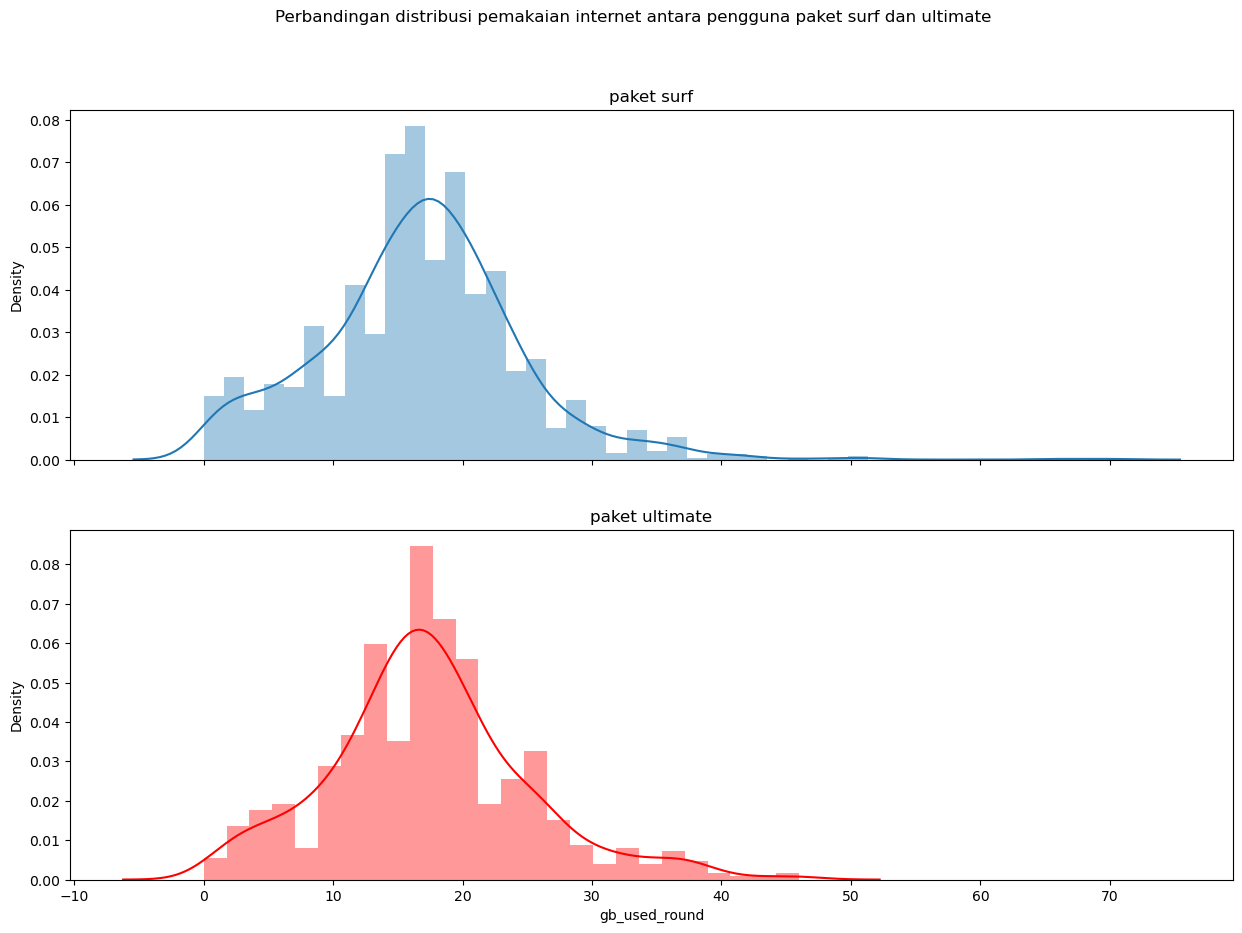

In [57]:
fig, axes = plt.subplots(2, figsize = (15, 10), sharex=True)
fig.suptitle('Perbandingan distribusi pemakaian internet antara pengguna paket surf dan ultimate')
sns.distplot(user_full_surf['gb_used_round'], ax=axes[0])
axes[0].set_title('paket surf')
sns.distplot(user_full_ultimate['gb_used_round'], ax=axes[1], color='red')
axes[1].set_title('paket ultimate')

plt.show()

Dari kurva distribusi untuk pemakaian internet antara pengguna paket prabayar surf dan ultimate, dapat dilihat bahwa pengguna prabayar ultimate lebih banyak mengunakan internet dibandingkan dengan pengguna prabayar surf. Walaupun mayoritas pengguna paket prabayar surf dan ultimate menggunakan internet sebanyak 15-20 gigabita per bulan, namun lebih banyak distribusi pengguna prabayar paket surf yang menggunakan internet per bulan dibawah 5 gigabita dibandingkan dengan pengguna prabayar ultimate. Selain itu Banyak pengguna paket prabayar surf yang melebihi penggunaan batas paket gratis dibandingkan dengan pengguna paket prabayar ultimate. Hal ini dapat terlihat dari banyak pengunaan data internet yang melebihi 15 gigabita pada paket surf dibandingkan dengan pengguna data internet yang melebihi 30 gigabita pada paket ultimate.

In [58]:
#Melihat rata - rata dan standar deviasi penggunaan internet paket surf
user_full_surf['gb_used_round'].describe()

count    1548.000000
mean       16.671835
std         7.840660
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_round, dtype: float64

In [59]:
#Melihat variansi penggunaan internet paket surf
np.var(user_full_surf['gb_used_round'])

61.436235135442004

In [60]:
#Melihat rata - rata dan standar deviasi penggunaan internet paket ultimate
user_full_ultimate['gb_used_round'].describe()

count    708.000000
mean      17.334746
std        7.700701
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_round, dtype: float64

In [61]:
#Melihat variansi penggunaan internet paket surf
np.var(user_full_ultimate['gb_used_round'])

59.21704131954421

Nilai rata - rata, standar deviasi, dan varians dari penggunaan internet untuk paket surf berturut - turut adalah 16,67; 7,84; dan 61,44 gigabita. Sedangkan nilai rata - rata, standar deviasi, dan varians dari penggunaan internet untuk paket ultimate berturut - turut adalah 17,33; 7,70; dan 59,22 gigabita. Dapat terlihat bahwa rata - rata penggunaan internet untuk pengguna paket surf dan ultimate berbeda 1 gigabita dengan pengguna paket ultimate menggunakan internet lebih banyak dibandingkan pengguna internet surf. Walau berbeda hanya 1 gigabita, namun rata - rata pengguna paket internet surf harus membayar tagihan internet tambahan dikarenakan batas paket gratis dari surf sebesar 15 gigabita perbulannya. Standar deviasi dan varians dari kedua paket ini juga berbeda tipis, sehingga perbandingan persebaran data dengan rata - rata nya hampir sama. 

### Penggunaan telepon

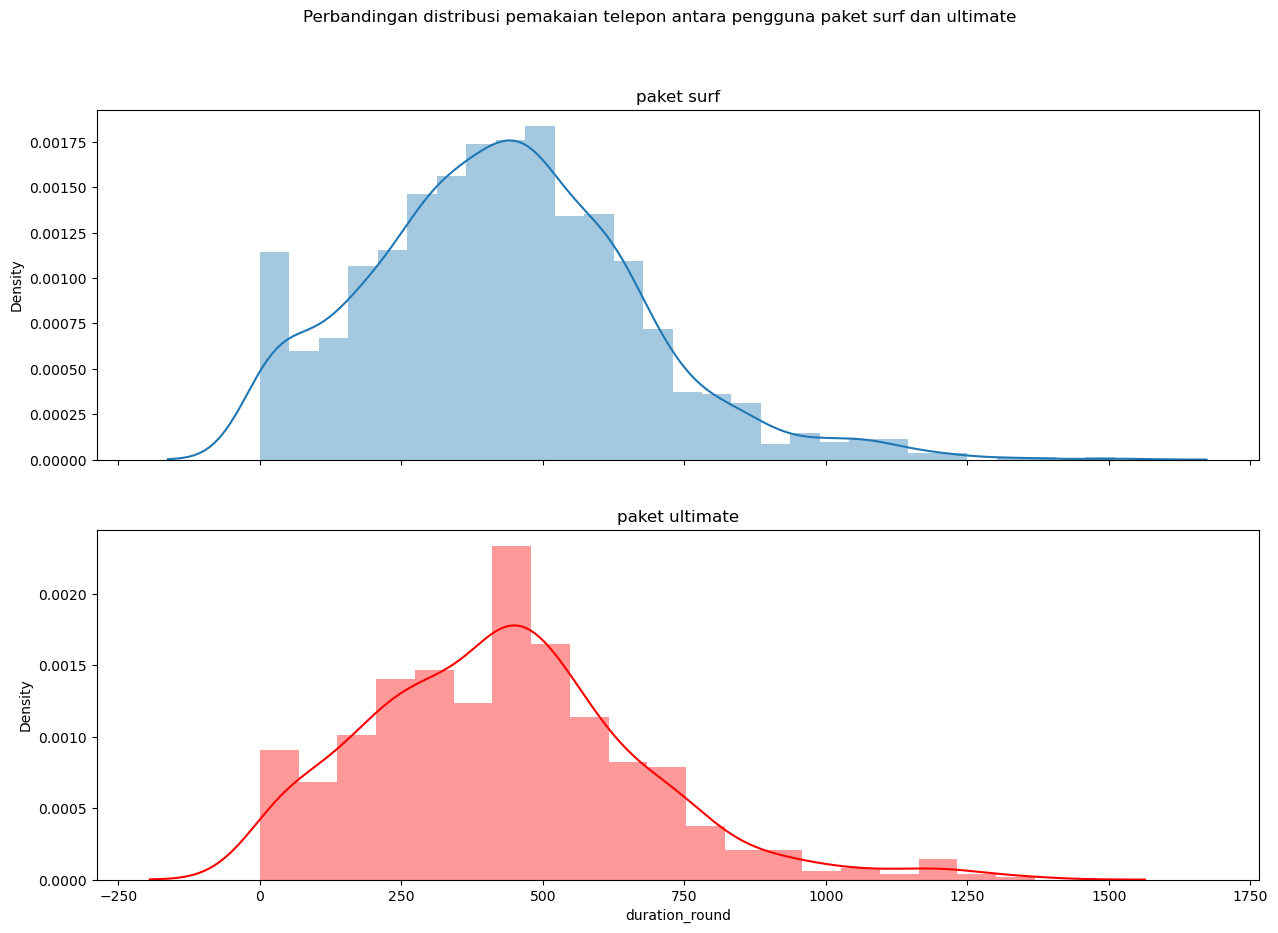

In [62]:
fig, axes = plt.subplots(2, figsize = (15, 10), sharex=True)
fig.suptitle('Perbandingan distribusi pemakaian telepon antara pengguna paket surf dan ultimate')
sns.distplot(user_full_surf['duration_round'], ax=axes[0])
axes[0].set_title('paket surf')
sns.distplot(user_full_ultimate['duration_round'], ax=axes[1], color='red')
axes[1].set_title('paket ultimate')

plt.show()

Dari kurva diatas dapat terlihat bahwa penggunaan telepon pada pengguna paket prabayar surf dan ultimate sedikit berbeda, yakni: 
1. Mayoritas pengguna paket surf menelepon dengan total durasi sekitar 500-600 menit setiap bulan nya, sedangkan mayoritas pengguna paket ultimate menelpon dengan total durasi sekitar 400-500 menit setiap bulan nya. 
2. Dengan banyaknya pengguna paket surf yang menelepon lebih dari 500 menit setiap bulan, maka banyak pengguna paket surf yang perlu membayar biaya tambahan dikarenakan pada paket surf batas paket gratis adalah 500 menit per bulan.
3. Berbeda dengan pengguna paket surf yang banyak penggunanya harus membayar biaya tambahan untuk durasi telepon, pengguna paket ultimate tidak ada yang melebihi dari batas paket gratis ultimate yakni 3000 menit per bulan. Pengguna ultimate menggunakan telepon paling banyak pada rentang 1500 menit per bulan.
4. Banyak data yang menunjukan durasi telepon kurang dari 50 menit per bulan. Hal ini disebabkan karena masih adanya data yang mencatat durasi telepon sebesar 0 detik, yang kemungkinan besar adalah panggilan tidak terjawab.

In [63]:
#Melihat rata - rata dan standar deviasi penggunaan telepon paket surf
user_full_surf['duration_round'].describe()

count    1548.000000
mean      428.804264
std       235.233380
min         0.000000
25%       271.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: duration_round, dtype: float64

In [64]:
#Melihat varians dari penggunaan telepon paket surf
np.var(user_full_surf['duration_round'])

55298.99721696407

In [65]:
#Melihat rata - rata dan standar deviasi penggunaan telepon paket ultimate
user_full_ultimate['duration_round'].describe()

count     708.000000
mean      430.151130
std       240.973869
min         0.000000
25%       259.000000
50%       425.000000
75%       565.250000
max      1369.000000
Name: duration_round, dtype: float64

In [66]:
#Melihat varians dari penggunaan telepon paket ultimate
np.var(user_full_ultimate['duration_round'])

57986.38817668924

Nilai rata - rata, standar deviasi, dan varians dari penggunaan telepon paket surf adalah 428,80; 235,23; dan 55298,99 menit. Sedangkan nilai rata - rata, standar deviasi, dan varians dari penggunaan telepon paket ultimate adalah 430,15; 240,97; dan 57986,39 menit. Dapat dilihat bahwa nilai rata - rata dari penggunaan telepon paket surf dan ultimate hanya berbeda 2 menit dengan rata - rata pengguna paket ultimate lebih banyak menelepon dibandingkan dengan rata - rata pengguna paket surf. Perbedaan standar deviasi dari pengguna paket surf lebih rendah 5 menit dibandingkan standar deviasi pengguna paket ultimate. Namun perbedaan varians sangat jauh dibandingkan rata - rata maupun standar deviasi hal ini disebabkan karena varians adalah pangkat dari standar deviasi.

### Penggunaan SMS

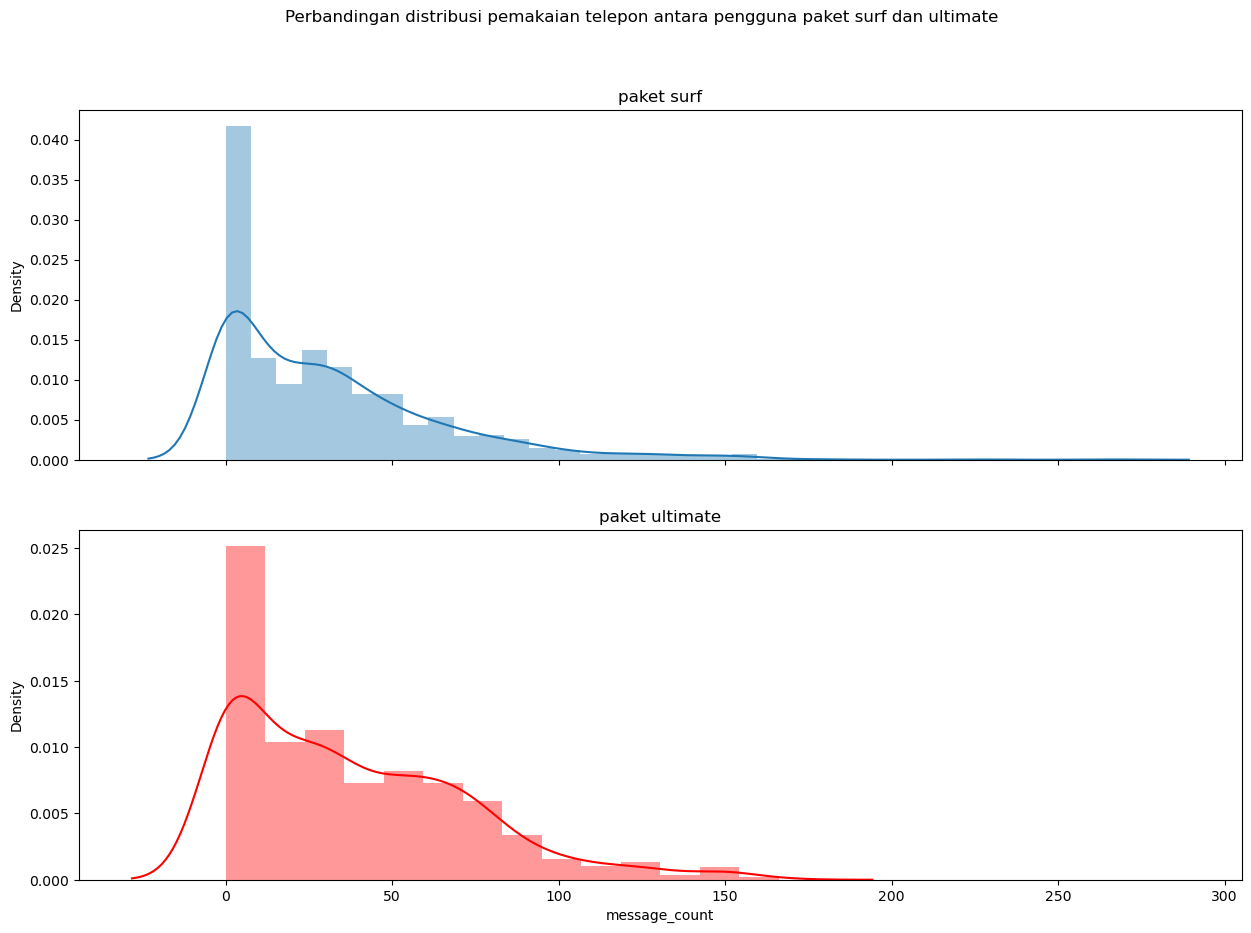

In [67]:
fig, axes = plt.subplots(2, figsize = (15, 10), sharex=True)
fig.suptitle('Perbandingan distribusi pemakaian telepon antara pengguna paket surf dan ultimate')
sns.distplot(user_full_surf['message_count'], ax=axes[0])
axes[0].set_title('paket surf')
sns.distplot(user_full_ultimate['message_count'], ax=axes[1], color='red')
axes[1].set_title('paket ultimate')

plt.show()

Dari kurva diatas, dapat terlihat bahwa banyak pelanggan per bulan, baik paket surf maupun paket ultimate, mengirimkan SMS kurang dari 20 SMS per bulan nya. Hal ini kemungkinan disebabkan karena SMS sudah mengalami penurunan yang disebabkan dengan meningkatnya popularitas pengiriman pesan berbasis online seperti [Whatsapp](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiwpoiRtoD8AhUf-3MBHdhlAI8QFnoECAwQAQ&url=https%3A%2F%2Fwww.telemessage.com%2Fwhy-is-whatsapp-more-popular-than-sms-in-europe-infographic%2F&usg=AOvVaw14hlkG2KGfXVB8whBRjAg1) atau Telegram. Selain itu, terdapat beberapa pelanggan paket surf yang membayar tambahan tagihan SMS yang terlihat dari masih ada pelanggan yang mengirimkan lebih dari jatah batas paket gratis paket surf yakni 50 SMS per bulan. Sedangkan pelanggan paket ultimate tidak ada yang mendapatkan tambahan tagihan SMS.

In [68]:
#Melihat rata - rata dan standar deviasi penggunaan SMS paket surf
user_full_surf['message_count'].describe()

count    1548.000000
mean       31.111757
std        33.641112
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_count, dtype: float64

In [69]:
#Melihat varians penggunaan SMS paket surf
np.var(user_full_surf['message_count'])

1130.9933243027626

In [70]:
#Melihat rata - rata dan standar deviasi penggunaan SMS paket ultimate
user_full_ultimate['message_count'].describe()

count    708.000000
mean      37.798023
std       34.896049
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_count, dtype: float64

In [71]:
#Melihat varians penggunaan SMS paket ultimate
np.var(user_full_ultimate['message_count'])

1216.0142898751894

Nilai rata - rata, standar deviasi, dan varians dari penggunaan paket SMS paket surf adalah 31,11; 33,64; dan 1130,99 SMS. Sedangkan untuk nilai rata - rata, standar deviasi, dan varians dari penggunaan paket SMS paket surf adalah 37,80; 34,90; dan 1216,01 SMS. Perbedaan rata - rata SMS yang dikirim perbulan dari pengguna paket surf lebih rendah 6 SMS dibandingkan dengan rata - rata SMS yang dikirim perbulan dari pengguna paket ultimate. Dapat terlihat bahwa tidak ada perbedaan jauh dari rata - rata penggunaan SMS dari pengguna paket surf dan ultimate. Namun dapat terlihat bahwa standar deviasi baik pada paket surf maupun ultimate lebih besar dibandingkan nilai rata - rata. Hal ini dapat disebabkan karena banyaknya pengguna yang tidak menggunakan SMS selama berlangganan bulanan dan data menampilkan tagihan per pelanggan dan bulanan. Perbedaan nilai varians dari kedua paket berbeda jauh namun hal ini disebabkan karena varians adalah pangkat dari standar deviasi.

## Uji Hipotesis

Terdapat 2 buah hipotesis yang akan diuji, yakni
1. Terdapat perbedaan rata - rata pendapatan antara paket surf dan paket ultimate
2. Terdapat perbedaan rata - rata pendapatan antara wilayah NY-NJ dengan wilayah lainnya

### Perbedaan pendapatan paket surf dan ultimate

Pertama akan diuji hipotesis pertama. Dari hipotesis pertama, dapat diambil hipotesis nol dan hipotesis alternatifnya adalah:

- H0(hipotesis nol): Rata - rata pendapatan antara paket surf dan paket ultimate adalah sama
- H1(hipotesis alternatif): Rata - rata pendapatan antara paket surf dan paket ultimate tidak sama

In [72]:
#Pertama dilihat ukuran dari dataset pengguna paket surf dan ultimate
user_full_surf.shape, user_full_ultimate.shape

((1548, 21), (708, 21))

Dapat dilihat bahwa catatan pengguna paket surf dan paket ultimate memiliki data yang tidak seimbang, namun bukan berarti datanya harus memiliki jumlah kolom yang sama. Hal lainnya adalah jumlah kedua data adalah lebih dari 50 data, sehingga dapat dilanjutkan untuk menguji hipotesis.

In [73]:
#melihat rata - rata pendapatan dari pengguna paket surf dan ultimate
user_full_surf['income'].mean(), user_full_ultimate['income'].mean()

(60.6509496124031, 72.35310734463278)

Rata - rata pendapatan pengguna ultimate lebih tinggi dibandingkan dengan rata - rata pendapatan pengguna surf. Selanjutnya untuk membuktikan hipotesis perlu dilihat varians dari pendapatan kedua paket prabayar.

In [74]:
#Lalu dilihat varians dari jumlah pendapatan pengguna paket surf dan ultimate
np.var(user_full_surf['income']), np.var(user_full_ultimate['income'])

(3061.9648250026244, 131.77362028791546)

Ternyata varians untuk paket data surf lebih tinggi dibandingkan dengan paket data ultimate. Hal ini dapat disimpulkan bahwa persebaran pendapatan untuk paket surf lebih besar dibandingkan dengan paket ultimate. Selanjutnya akan dilakukan pengujian hipotesis dengan t-test.

In [75]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(user_full_surf['income'], user_full_ultimate['income'],
                      equal_var=False) #penggunaan equal var yang False karena perbedaan varians yang signifikan
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  3.199397264170127e-15
Kita menolak hipotesis nol


Dari t-test dapat diperoleh bahwa nilai p jauh lebih rendah dibandingkan dengan nilai ambang batas kepercayaan yakni 0,05. Sehingga dipilih hipotesis alternatif yakni <b>rata - rata pendapatan antara paket surf dan paket ultimate TIDAK SAMA </b> dengan rata - rata pendapatan paket ultimate lebih tinggi dibandingkan rata - rata pendapatan paket surf.

### Perbedaan pendapatan wilayah NY-NJ dengan wilayah lainnya

Selanjutnya dilakukan pengujian hipotesis kedua, dengan hipotesis nol dan alternatifnya adalah:
- H0(hipotesis nol) : rata - rata pendapatan antara pengguna wilayah NY-NJ dengan pengguna wilayah lainnya adalah sama
- H1(hipotesis alternatif) : rata - rata pendapatan antara pengguna wilayah NY-NJ dengan pengguna wilayah lainnya tidak sama

Untuk memudahkan menguji hipotesis ini, pertama dibuat 2 dataset yang memisahkan antara pengguna dari NY-NJ dan pengguna diluar wilayah NY-NJ

In [76]:
user_full_ny_nj = user_full[user_full['from_ny_nj'] == True]
user_full_ny_nj.shape

(371, 21)

In [77]:
user_full_other = user_full[user_full['from_ny_nj'] == False]
user_full_other.shape

(1885, 21)

Dapat dilihat bahwa pengguna yang berasal dari wilayah NY-NJ lebih sedikit dibandingkan pengguna dari luar wilayah NY-NJ. Namun kedua dataset ini memiliki lebih dari 50 data sehingga kita bisa melanjutkan untuk menguji hipotesis.

In [78]:
user_full_ny_nj['income'].mean(), user_full_other['income'].mean()

(59.92859838274933, 65.18841379310345)

Dapat dilihat bahwa rata - rata pendapatan untuk pengguna wilayah NY-NJ lebih tinggi dibandingkan rata - rata pendapatan untuk pengguna wilayah NY-NJ. Lalu dilihat varians dari pendapatan untuk wilayah NY-NJ dan diluar wilayah NY-NJ.

In [79]:
np.var(user_full_ny_nj['income']), np.var(user_full_other['income'])

(1910.3415204074363, 2218.7964875104794)

In [80]:
diff_var = (np.var(user_full_other['income']) - np.var(user_full_ny_nj['income']))/np.var(user_full_other['income'])
print('{:.2%}'.format(diff_var))

13.90%


Nilai varians antara pendapatan untuk pengguna wilayah NY-NJ dengan pengguna luar wilayah NY-NJ berbeda sekitar 300 dollar dengan persentase perbedaan sebesar 13,9%. Nilai perbedaan ini cukup jauh, namun tidak sejauh perbedaan varians untuk paket surf dengan paket ultimate

In [81]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(user_full_ny_nj['income'], user_full_other['income'],
                      equal_var=True) #penggunaan equal var yang True karena perbedaan varians yang tidak terlalu signifikan
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.04693355751103774
Kita menolak hipotesis nol


Dari t-test dapat dilihat bahwa nilai p ini hampir mendekati dengan nilai ambang batas kepercayaan 0,05. Nilai ini lebih dekat dibandingkan dengan pengujian hipotesis sebelumnya namun masih dibawah dari nilai ambang batas kepercayaan. Sehingga digunakan hipotesis alternatif, yakni <b>rata - rata pendapatan untuk pengguna wilayah NY-NJ dengan pengguna luar wilayah NY-NJ TIDAK SAMA </b> dengan pendapatan pengguna untuk luar wilayah NY-NJ lebih tinggi dibandingkan dengan pengguna wilayah NY-NJ.

## Kesimpulan

Telah dilakukan berbagai tahapan, dari eksplorasi dataset yang ada, memroses data agar siap dilakukan analisa, penganalisaan data, dan pembuktian hipotesis, dengan kesimpulan yang diperoleh sebagai berikut:
- Terdapat 5 buah dataset dengan tiap - tiap dataset nya memberikan informasi terkait histori telepon, sms, internet pengguna, informasi pengguna, dan jenis paket prabayar yang ditawarkan Megaline
- Melakukan pemrosesan data agar data bisa diubah menjadi data yang siap digunakan dalam kegiatan analisa, dari pengubahan tipe data, menambah kolom baru untuk melakukan kategori wilayah, pembulatan dan akumulasi dari penggunaan internet, sms, dan telepon per pelanggan dan per bulan, menghitung tambahan tagihan yang perlu dibayar pelanggan, serta menghilangkan data - data yang dirasa janggal
- Setelah data diproses, dilakukan penganalisaan akan data. Diperoleh bahwa rata - rata penggunaan internet, sms, dan telepon dari pengguna paket surf hampir mirip dengan pengguna paket ultimate. Namun lebih banyak pelanggan paket surf yang harus membayar biaya tambahan dikarenakan  pelanggan telah melewati batas paket gratis dibandingan pelanggan paket ultimate

Dan bagi departemen periklanan, beberapa saran yang bisa dipergunakan dari hasil analisis adalah: 
- Paket ultimate memberikan rata - rata pendapatan yang lebih tinggi dibandingkan degan paket surf
- Pelanggan dari wilayah diluar NY-NJ memberikan rata - rata pendapatan yang lebih tingi dibandingkan dengan pelanggan dari wilayah NY-NJ